## Week 1-2: Linear regression


### Notes: 

- Office hours updated: 
    - My OH: Monday 2:00pm - 4:00pm
    - TA's OH: Thursday 3:00pm - 5:00pm
    - Remote on Zoom - links can be found on Piazza and Canvas
    - Homework 2 - 5 will due on Friday midnight
  
- Lecture notes are adapted from Prof. James Sharpnack's notes
- We will use the life satisfaction data example and some of the code is based on the notebook file [01 in Aurélien Geron's github page](https://github.com/ageron/handson-ml)

### References:

- Casella, G. and R. Berger (2002). _Statistical Inferece_. Second Edition, Duxbury. 
- A simple explanation for understanding the OLS: [website](https://towardsdatascience.com/ols-linear-regression-gauss-markov-blue-and-understanding-the-math-453d7cc630a5)
- Vapnik, V. (1991). _Principles of Risk Minimization for Learning Theory_. Advances in Neural Information Processing Systems 4:831--838


<img src="cox.png" width=50%>

## Inference vs. Prediction

- _statistical inference_: is this effect significant? is the model useful? etc.
- _prediction_: does this algorithm predict the response variable well?

### Terms

- *predictor* variables: X variables
- *response* variable: Y variable
- ``X``: $n \times p$ design matrix / features
- ``Y``: $n$ label vector


### Linear model

$$
y_i = f_\beta(x_i) + \varepsilon_i, 
$$
$$
f_\beta(x_i) = \beta_0 + \sum_{j=1}^p \beta_j x_{i,j}$$

#### Matrix notation:

$$
y = X'\beta + \varepsilon,
$$

where $y \in \mathbb{R}^{n}$, $X \in \mathbb{R}^{n \times p}$, $\beta \in \mathbb{R}^p$. 
$\beta = (\beta_0, \beta_1, \dots, \beta_p)'$ and $y = (y_1, \dots, y_n)$' 

#### Ordinary least squares

Assuming $\varepsilon_1, \dots, \varepsilon_n$ are i.i.d., then
$$
\hat\beta = (X'X)^{-1} X'y
$$

* OLS estimator: $\mathbb \varepsilon_i = 0$ and $\text{var} (\varepsilon_i) = \sigma^2$.
    - $\mathbb{E}(\hat \beta) = \beta$
    - $\text{var}(\hat\beta) = \sigma^2 (X'X)^{-1}$
    - $\hat \beta$ is BLUE
* Assuming $\varepsilon_i \sim N(0, \sigma^2)$, $\hat \beta$ is the maximum likelihood estimator, and it is UMVUE
    

## Statistical inference v.s. Prediction

### <font color='blue'>1. Statistical inference perspective</font>

- statistically test for significance of effects
- requires normality assumptions, homoscedasticity, linear model is "correct"
- hard to obtain significance for individual effect under colinearity

In [1]:
## I will be using Python 3, for install instructions see 
## http://anson.ucdavis.edu/~jsharpna/DSBook/unit1/intro.html#installation-and-workflow

## The following packages are numpy (linear algebra), pandas (data munging), 
## sklearn (machine learning), matplotlib (graphics), statsmodels (statistical models)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
## Lines that start with ! run a bash command

!ls -l ../data/winequality-red.csv

-rw-rw-r--@ 1 poning  staff  84199 Jun  1  2020 ../data/winequality-red.csv


In [3]:
# read dataset

!head ../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


Wine dataset description
- 84199 bytes (not large, feel free to load into memory)
- header with quotations " in the text
- each line has floats without quotations
- each datum separated by ;

Some Python basics:
- file input/output
- [f(a) for a in L] list comprehensions
- iterables, basic types, built-in functions

In [4]:
datapath = "../data/"
with open(datapath + 'winequality-red.csv','r') as winefile:
    header = winefile.readline()
    wine_list = [line.strip().split(';') for line in winefile]

In [5]:
wine_ar = np.array(wine_list,dtype=np.float64)

In [6]:
names = [name.strip('"') for name in header.strip().split(';')]
print(names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [7]:
#Subselect the predictor X and response y
y = wine_ar[:,-1]
X = wine_ar[:,:-1]
n,p = X.shape

In [8]:
y.shape, X.shape #just checking

((1599,), (1599, 11))

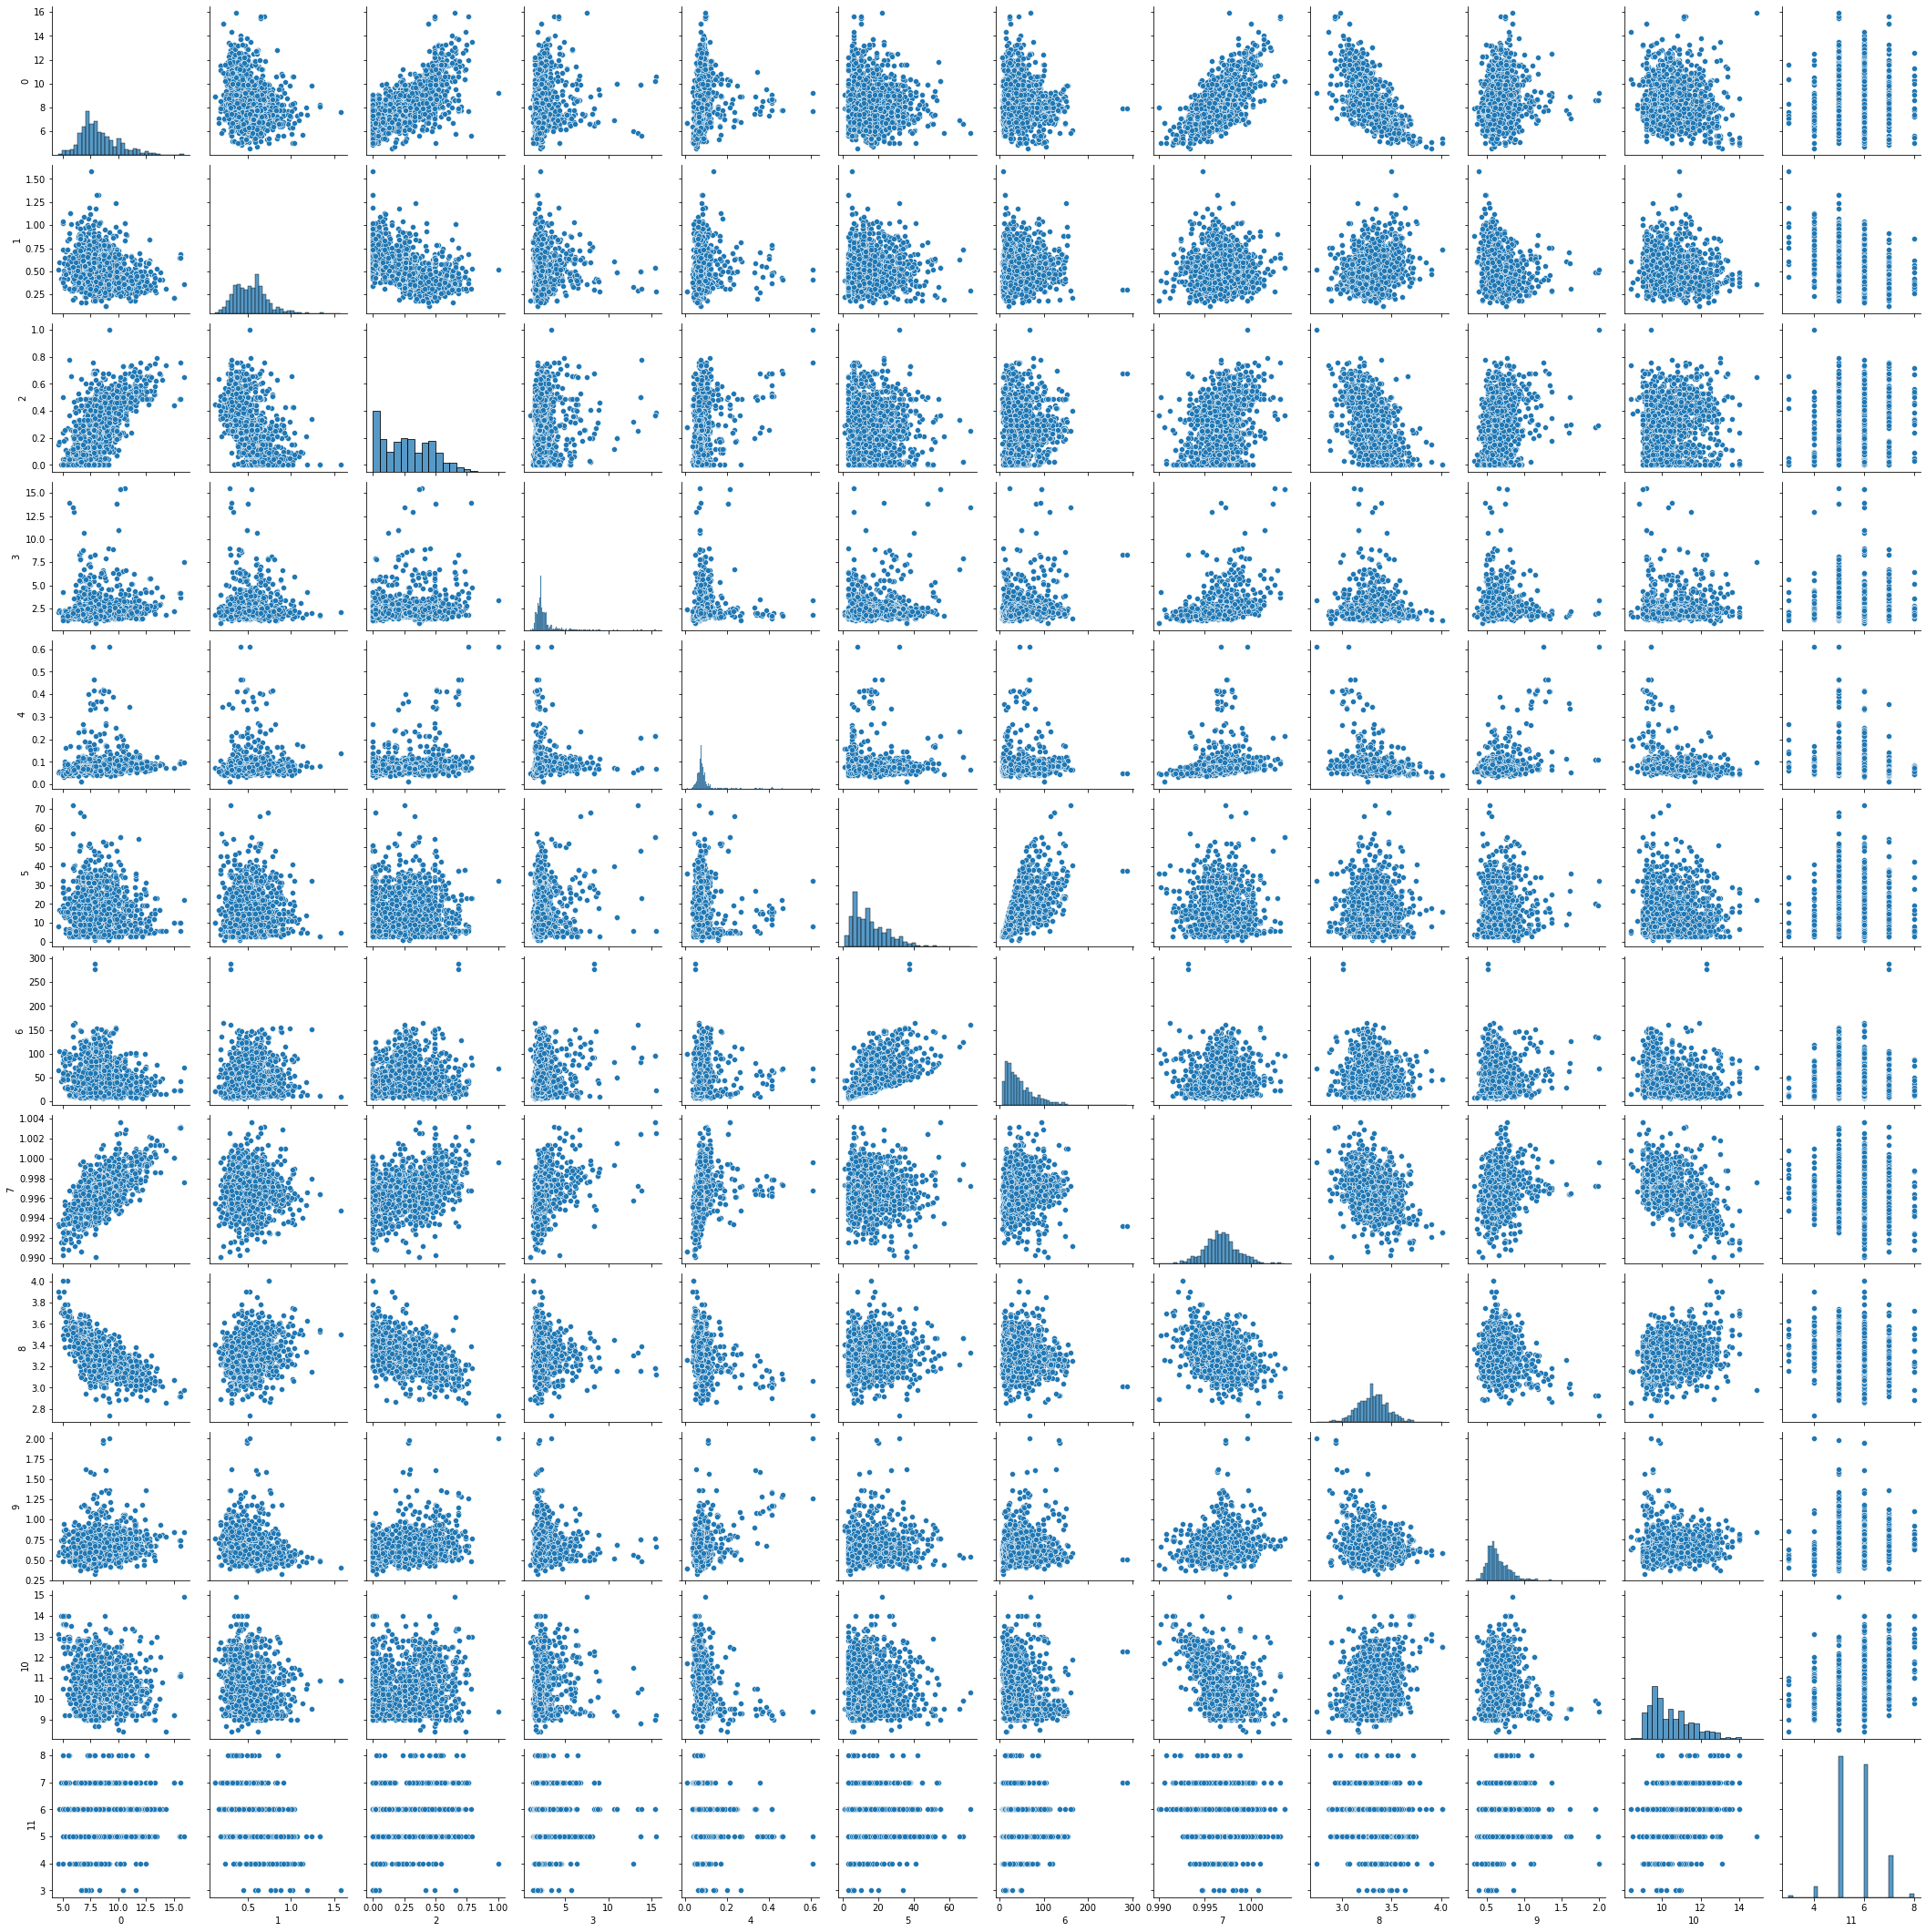

In [9]:
# check correlation

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

wine_pd = pd.DataFrame(wine_ar)
# Basic correlogram
sns.pairplot(wine_pd)
plt.show()

In [10]:
# Fit OLS 

import statsmodels.api as sm

X = np.hstack((np.ones((n,1)),X)) #add intercept
wine_ols = sm.OLS(y,X) #Initialize the OLS 
wine_res = wine_ols.fit()

In [11]:
wine_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.79e-145
Time:                        21:54:45   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300     -19.607      63.538
x1             0.0250      0.026      0.963      0.336      -0.026       0.076
x2            -1.0836      0.121     -8.948      0.000      -1.321      -0.846
x3            -0.1826      0.147     -1.240      0.215      -0.471       0.106
x4             0.0163      0.015      1.089      0.276      -0.013       0.046
x5            -1.8742      0.419     -4.470      0.000      -2.697      -1.052
x6             0.0044      0.002      2.009      0.045       0.000       0.009
x7            -0.0033      0.001     -4.480      0.000      -0.005      -0.002
x8           -17.8812     21.633     -0.827      0.409     -60.314      24.551
x9            -0.4137      0.192     -2.159      0.031      -0.789      -0.038
x10            0.9163      0.114      8.014      0.000       0.692       1.141
x11            0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In addition, one needs to check assumptions: 
   - linearity
   - normal assumption (using QQ plot)
   - heteroskedasticity
   - independence of residuals error terms
   
Why?

### <font color='blue'>2. Prediction perspective</font>

- think of OLS as a black-box model for predicting $Y | X$
- how do we evaluate performance of prediction?
- how do we choose between multiple OLS models?


Machine Learning

A computer program learns from experience, E, with respect to class of tasks, T, and performance measure, P, if its performance at T improves by P with E.

Examples of these categories are,
- E: data (training)
- P: loss (test), reward
- T: classification, regression, expert selection, etc. 

### Supervised learning and unsupervised learning

__Supervised learning__: Learning machine that takes $p$-dimensional data $x_i = (x_{i,1}, \ldots, x_{i,p})$ and predicts $y_i \in \mathcal Y$. 

- *Task:* **Predict** $y$ given $x$ as $f_\beta(x)$
- *Performance Metric:* **Loss** measured with some function $\ell(\beta; x,y)$
- *Experience:* **Fit** the model with training data $\{x_i,y_i\}_{i=1}^{n}$

ESL's metaphor (Page 485): the _student_ presents an answer with $\hat y_i$ for each $x_i$ in the training sample, the _teacher_ provides either the correct answer or an error associate with the student's answer (usually through some loss function, e.g., $L(y, \hat y) = \|y - \hat y\|_2^2$.

__Unsupervised learning__: learning without a teacher. One observes $(x_1, \dots, x_N) \sim P(x)$, directly infer $P(x)$.



### Back to the linear regression

- **Fit**: Compute $\hat \beta$ from OLS with training data $\{x_i,y_i\}_{i=1}^{n}$
- **Predict**: For a new predictor $x_{n+1}$ predict $$\hat y = f_{\hat \beta}(x_{n+1}) = \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_{n+1,j}$$
- **Loss**: Observe new response $y_{n+1}$ and see loss $$\ell(\hat \beta; x_{n+1},y_{n+1}) = (f_{\hat \beta}(x_{n+1}) - y_{n+1})^2$$

### Exercise 1.1

- Look at the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the [LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html); look at the `fit` and `predict` methods for the linear regression
- Split the wine data using the `train_test_split` with `test_size` at 50%.
- Use the `LinearRegression` class to fit a linear regression on the training data
- Predict the wine quality on the test data and compute the average square error loss

In [12]:
## Answer to ex 1.1
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size = .5)
lr = LinearRegression()
lr.fit(X_tr,y_tr)

y_pred = lr.predict(X_te)
MSE = ((y_pred - y_te)**2).mean()

In [13]:
## It is reasonable to compare the MSE to the variance...
print(MSE)
print(y_te.var())

0.4172263253812908
0.61824375


In [15]:
## The following uses pandas!

datapath = "../data/"
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

# Load and prepare GDP per capita data

# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})
gdp_per_capita = gdp_per_capita.set_index("Country")

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats = full_country_stats.sort_values(by="GDP per capita")

In [16]:
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


Text(0.5, 1.0, 'Life Satisfaction Index')

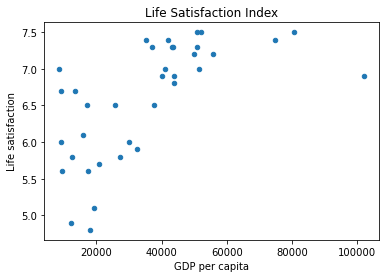

In [17]:
_ = full_country_stats.plot("GDP per capita",'Life satisfaction',kind='scatter')
plt.title('Life Satisfaction Index')

In [18]:
keepvars = full_country_stats.dtypes[full_country_stats.dtypes == float].index.values
keepvars = keepvars[:-1]
country = full_country_stats[keepvars]

In [19]:
Y = np.array(country['Life satisfaction'])
del country['Life satisfaction']
X_vars = country.columns.values
X = np.array(country)

In [20]:
def loss(yhat,y):
    """sqr error loss"""
    return (yhat - y)**2

def fit(X,Y):
    """fit the OLS from training w/ intercept"""
    lin1 = LinearRegression(fit_intercept=True) # OLS from sklearn
    lin1.fit(X,Y) # fit OLS
    return np.append(lin1.intercept_,lin1.coef_) # return betahat

def predict(x, betahat):
    """predict for point x"""
    return betahat[0] + x @ betahat[1:]

### Summary

- Supervised learning task is to predict $Y$ given $X$
- Fit is using training data to fit parameters
- Predict uses the fitted parameters to do prediction
- Loss is a function that says how poorly you did on datum $x_i,y_i$

### Risk and Empirical Risk (from statistical learning theory viewpoint)

Assuming that there is a joint probability distribution $P(x,y)$ over $X$ and $Y$, and that the training set consists of $n$ instances $(x_{1},y_{1}),\ldots ,(x_{n},y_{n})$ drawn i.i.d. from $P(x,y)$.
Introducing the assumption of a joint probability distribution allows us to model uncertainty in predictions

Given a loss $\ell(\theta; X,Y)$, for parameters $\theta$, the *risk* is 
$$
R(\theta) = \mathbb E \ell(\theta; X,Y).
$$

And given training data $\{x_i,y_i\}_{i=1}^{n}$ (drawn iid to $X,Y$), then the *empirical risk* is
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i).
$$
Notice that $\mathbb E R_n(\theta) = R(\theta)$ for fixed $\theta$.

For a class of parameters $\Theta$, the <font color='red'>*empirical risk minimizer (ERM)*</font> is the 
$$
\hat \theta = \arg \min_{\theta \in \Theta} R_n(\theta)
$$
(may not be unique).

### OLS is the ERM

OLS minimizes the following objective,
$$
R_n(\beta) = \frac 1n \sum_{i=1}^n \left(y_i - x_i^\top \beta \right)^2
$$
with respect to $\beta$ (including $\beta_0$).
This is the ERM for square error loss and linear predictor.

### Why is ERM a good idea?

For a fixed $\theta$ we know by the Law of Large Numbers (as long as expectations exist and data is iid),
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i) \rightarrow \mathbb E \ell(\theta; X,Y) = R(\theta),
$$
where (uniform) convergence is in probability (or almost surely)$^1$.
We want to minimize $R(\theta)$ so $R_n(\theta)$ is a pretty good surrogate.

1. Proof; see Vapnik (1991)

### Issue with training error in supervised learning.

Let $\hat \theta$ be the ERM, then the *training error* is
$$
R_n(\hat \theta) = \min_{\theta \in \Theta} R_n(\theta)
$$
which does NOT converge to $R(\theta)$ because
$$
\mathbb E R_n(\hat \theta) = \mathbb E \min_\theta R_n(\theta) \ne \min_{\theta} \mathbb E R_n(\theta) = \min_\theta R(\theta).
$$

### Solution

Perhaps the simplest and most widely used method is cross-validation (cv)

Split the data randomly into training and test sets: 
- train $\hat \theta$ with the training data
- test $\hat \theta$ with the test data

Because the test data is independent of $\hat \theta$ we can think of the training process as fixed and test error is now unbiased for risk of $\hat \theta$.

In [21]:
## randomly shuffle data and split
n,p = X.shape
Ind = np.arange(n) 
np.random.shuffle(Ind) 
train_size = 2 * n // 3 +1 # set training set size
X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:]
Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]]

In [22]:
## compute losses on test set
betahat = fit(X_tr,Y_tr)
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [23]:
train_losses

[8.532319550870464e-25,
 2.0038329170062053e-25,
 1.3196144108627608e-25,
 6.162601113109175e-24,
 3.541196603537122e-25,
 1.1937122103894873e-25,
 1.3496337237500411e-24,
 3.2604323298990065e-24,
 1.4115009291029042e-25,
 3.238018424998962e-24,
 1.3954160552454478e-26,
 3.0088803644421302e-24,
 1.948557433377369e-25,
 2.3003183996244704e-27,
 1.2907361852748826e-23,
 1.0887246846658859e-23,
 5.58211734268575e-23,
 1.1378537585516926e-24,
 5.69952004022181e-27,
 3.457135585476771e-25,
 8.747599691905278e-26,
 4.848780885595262e-25,
 2.8304408165420426e-25,
 1.979296187410211e-24,
 7.228118693234816e-24]

In [24]:
test_losses

[0.956394868702322,
 0.07156197489319054,
 0.6214134551078253,
 0.21474769063240887,
 0.385553396821689,
 6.7115537253951185,
 0.900514728588451,
 0.078496561821159,
 4.59591545644224,
 0.06795997925171368,
 1.3087291238049839]

In [25]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))
print("n p :",n,p)

train avg loss: 4.407950234073944e-24
test avg loss: 1.4466219055873728
n p : 36 24


In [26]:
def train_test_split(X,Y,split_pr = 0.5):
    """train-test split"""
    n,p = X.shape
    Ind = np.arange(n) 
    np.random.shuffle(Ind) 
    train_size = int(split_pr * n) # set training set size
    X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:]
    Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]]
    return (X_tr,Y_tr), (X_te, Y_te)

In [27]:
Y = wine_ar[:,-1]
X = wine_ar[:,:-1]
(X_tr,Y_tr), (X_te, Y_te) = train_test_split(X,Y)

In [28]:
## compute losses on test set
betahat = fit(X_tr,Y_tr)
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [29]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))

train avg loss: 0.4325598690601424
test avg loss: 0.4060199083532045


### Summary

- Want to minimize true risk (expected loss)
- Instead we minimize empirical risk (training error)
- Training error is now biased, so we do training test split